In [32]:
# useful libraries

import math
import pandas as pd 
import numpy as np 
import seaborn as sns
from numpy import loadtxt 
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

# for visualizing data inline jupyter notebook

#These algorithms must be used
from sklearn.neural_network import MLPRegressor #neural network library from sklearn
from sklearn.ensemble import RandomForestRegressor # RandomForest Regressor
from sklearn.cluster import KMeans #Kmeans library 

#further libraries could be added when needed
from sklearn.ensemble import GradientBoostingRegressor #Gradient boosting regressor
#Find something else

import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Read training data
diss_profiles = np.loadtxt(r'Data/TrainingData/DISS.csv', delimiter=',', dtype='float64') # Read dissolution profile
comp = np.loadtxt(r'Data/TrainingData/COMP.csv', delimiter=',', dtype='float64') # Read compression force
comp_max = np.loadtxt(r'Data/TrainingData/COMPMax.csv', delimiter=',', dtype='float64') # Read compression force
raman_re = np.loadtxt(r'Data/TrainingData/RAMANRE.csv', delimiter=',', dtype='float64') # Read Raman reflection
raman_tr = np.loadtxt(r'Data/TrainingData/RAMANTR.csv', delimiter=',', dtype='float64') # Read Raman transmission
nir_re = np.loadtxt(r'Data/TrainingData/NIRRE.csv', delimiter=',', dtype='float64') # Read Nir reflection
nir_tr = np.loadtxt(r'Data/TrainingData/NIRTR.csv', delimiter=',', dtype='float64') # Read Nir transmission

# Read Validation data
DISS_PROFILES = np.loadtxt(r'Data/Validation/Diss-validation.csv', delimiter=',', dtype='float64') # Read dissolution profile
COMP = np.loadtxt(r'Data/Validation/Comp-validation.csv', delimiter=',', dtype='float64') # Read compression force
COMP_MAX = np.loadtxt(r'Data/Validation/COMPMAX-validation.csv', delimiter=',', dtype='float64') # Read compression force
RAMAN_RE = np.loadtxt(r'Data/Validation/RamanRE-validation.csv', delimiter=',', dtype='float64') # Read Raman reflection
RAMAN_TR = np.loadtxt(r'Data/Validation/RamanTR-validation.csv', delimiter=',', dtype='float64') # Read Raman transmission
NIR_RE = np.loadtxt(r'Data/Validation/NIRRE-validation.csv', delimiter=',', dtype='float64') # Read Nir reflection
NIR_TR = np.loadtxt(r'Data/Validation/NIRTR-validation.csv', delimiter=',', dtype='float64') # Read Nir transmission

In [34]:
print(comp_max.shape)
# comp_max.reshape(-1, 1)
# COMP_MAX.reshape(-1, 1)
print(comp_max.shape)

(111,)
(111,)


In [35]:
# # Sizes of all matrices

# # Training Data
# print('Training Data')
# print('Raman Transmission: ', len(raman_tr), 'x', len(raman_tr[0]))
# print('Raman Reflection: ', len(raman_re), 'x', len(raman_re[0]))
# print('NIR Transmission: ', len(nir_tr), 'x', len(nir_tr[0]))
# print('NIR Reflection: ', len(nir_re), 'x', len(nir_re[0]))
# print('Compression Force: ', len(comp), 'x', len(comp[0]))
# print('Compression Force(MAX): ', len(comp_max), 'x', 1)
# print('Dissolution Profiles: ', len(diss_profiles), 'x', len(diss_profiles[0]))
# print('')

# # Validation Data
# print('Validation Data')
# print('Raman Transmission: ', len(RAMAN_TR), 'x', len(RAMAN_TR[0]))
# print('Raman Reflection: ', len(RAMAN_RE), 'x', len(RAMAN_RE[0]))
# print('NIR Transmission: ', len(NIR_TR), 'x', len(NIR_TR[0]))
# print('NIR Reflection: ', len(NIR_RE), 'x', len(NIR_RE[0]))
# print('Compression Force: ', len(COMP), 'x', len(COMP[0]))
# print('Compression Force(MAX): ', len(COMP_MAX), 'x', 1)
# print('Dissolution Profiles: ', len(DISS_PROFILES), 'x', len(DISS_PROFILES[0]))
# print('')

In [36]:
# Scaling all feature matrices
stndrd = StandardScaler()

# Training data
raman_tr_sc = stndrd.fit_transform(raman_tr)
raman_re_sc = stndrd.fit_transform(raman_re)
nir_tr_sc   = stndrd.fit_transform(nir_tr)
nir_re_sc   = stndrd.fit_transform(nir_re)
# comp_sc     = stndrd.fit_transform(comp)
# comp_max_sc = stndrd.fit_transform(comp_max) 

# Validation data
RAMAN_TR_sc = stndrd.fit_transform(RAMAN_TR)
RAMAN_RE_sc = stndrd.fit_transform(RAMAN_RE)
NIR_TR_sc   = stndrd.fit_transform(NIR_TR)
NIR_RE_sc   = stndrd.fit_transform(NIR_RE)
# COMP_sc     = stndrd.fit_transform(COMP)
# COMP_MAX_sc = stndrd.fit_transform(COMP_MAX)

Training Data
Raman Tr:  [0.9970897]


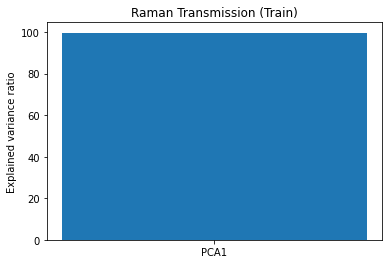

Raman Re:  [0.98451896]


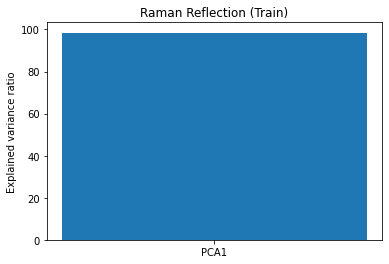

NIR Tr:  [0.70329761 0.06420798 0.02465503]


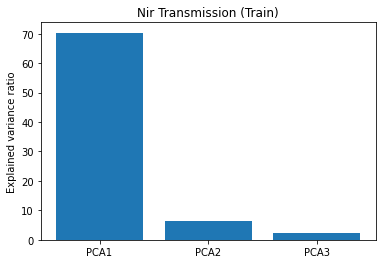

NIR Re:	 [0.85959002 0.08273421 0.0513304 ]


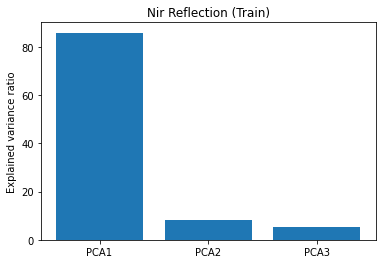

In [37]:
# Principal Component Analysis
# Training Data

print('Training Data')

# Raman
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(raman_tr_sc)
raman_tr_pca = pd.DataFrame(data = principalComponents
             ,columns = [' PC1']).to_numpy()
print('Raman Tr: ', pca.explained_variance_ratio_)
raman_tr_var =  pca.explained_variance_ratio_ * 100
plt.bar(['PCA1'], pca.explained_variance_ratio_ * 100)
plt.title('Raman Transmission (Train)')
plt.ylabel('Explained variance ratio')
plt.show()

principalComponents = pca.fit_transform(raman_re_sc)
raman_re_pca = pd.DataFrame(data = principalComponents
             ,columns = ['PC1']).to_numpy()
print('Raman Re: ', pca.explained_variance_ratio_)
raman_re_var =  pca.explained_variance_ratio_ * 100
plt.bar(['PCA1'], pca.explained_variance_ratio_ * 100)
plt.title('Raman Reflection (Train)')
plt.ylabel('Explained variance ratio')
plt.show()

# NIR
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(nir_tr_sc)
nir_tr_pca = pd.DataFrame(data = principalComponents
             ,columns = [' PC1','PC2', 'PC3']).to_numpy()
print('NIR Tr: ', pca.explained_variance_ratio_)
nir_tr_var =  pca.explained_variance_ratio_ * 100
plt.bar(['PCA1', 'PCA2', 'PCA3'], pca.explained_variance_ratio_ * 100)
plt.title('Nir Transmission (Train)')
plt.ylabel('Explained variance ratio')
plt.show()


principalComponents = pca.fit_transform(nir_re_sc)
nir_re_pca = pd.DataFrame(data = principalComponents
             ,columns = ['PC1','PC2', 'PC3']).to_numpy()
print('NIR Re:\t', pca.explained_variance_ratio_)
nir_re_var =  pca.explained_variance_ratio_ * 100
plt.bar(['PCA1', 'PCA2', 'PCA3'], pca.explained_variance_ratio_ * 100)
plt.title('Nir Reflection (Train)')
plt.ylabel('Explained variance ratio')
plt.show()

# Compression Forces
# pca = PCA(4)
# principalComponents = pca.fit_transform(comp_sc)
# comp_pca =pd.DataFrame(data = principalComponents
#             ,columns = ['PC1', 'PC2', 'PC3','PC3',]).to_numpy()
# print('Comp Forces: ', pca.explained_variance_ratio_)
# comp_var = pca.explained_variance_ratio_*100

# plt.bar(['PCA1', 'PCA2', 'PCA3', 'PCA4'], pca.explained_variance_ratio_ * 100)
# plt.title('Compression Force (Train)')
# plt.ylabel('Explained variance ratio')
# plt.show()

Validation Data
Raman Tr:  [0.99714681]


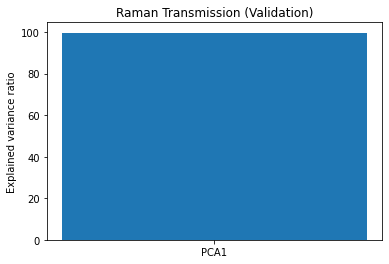

Raman Re:  [0.99126864]


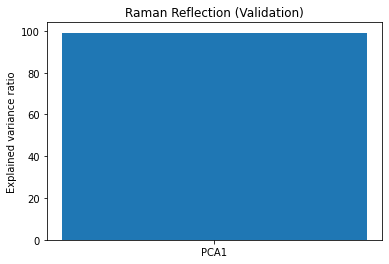

NIR Tr:  [0.69993912 0.08073642 0.03281069]


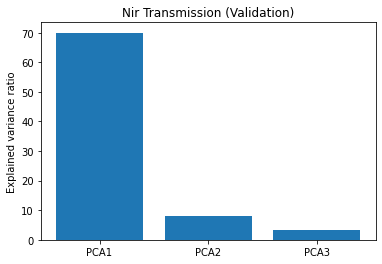

NIR Re:	 [0.81765639 0.11743939 0.05710731]


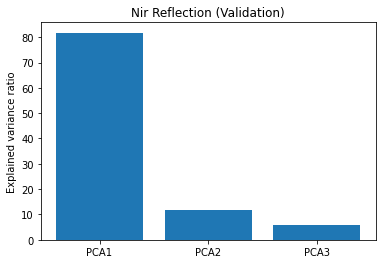

In [38]:
# Principal Component Analysis
# Validation Data

print('Validation Data')

# Raman
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(RAMAN_TR_sc)
RAMAN_TR_pca = pd.DataFrame(data = principalComponents
             ,columns = [' PC1']).to_numpy()
print('Raman Tr: ', pca.explained_variance_ratio_)
raman_tr_v_var =  pca.explained_variance_ratio_ * 100
plt.bar(['PCA1'], pca.explained_variance_ratio_ * 100)
plt.title('Raman Transmission (Validation)')
plt.ylabel('Explained variance ratio')
plt.show()

principalComponents = pca.fit_transform(RAMAN_RE_sc)
RAMAN_RE_pca = pd.DataFrame(data = principalComponents
             ,columns = ['PC1']).to_numpy()
print('Raman Re: ', pca.explained_variance_ratio_)
raman_re_v_var =  pca.explained_variance_ratio_ * 100
plt.bar(['PCA1'], pca.explained_variance_ratio_ * 100)
plt.title('Raman Reflection (Validation)')
plt.ylabel('Explained variance ratio')
plt.show()


# NIR
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(NIR_TR_sc)
NIR_TR_pca = pd.DataFrame(data = principalComponents
             ,columns = [' PC1','PC2', 'PC3']).to_numpy()
print('NIR Tr: ', pca.explained_variance_ratio_)
nir_tr_v_var =  pca.explained_variance_ratio_ * 100
plt.bar(['PCA1', 'PCA2', 'PCA3'], pca.explained_variance_ratio_ * 100)
plt.title('Nir Transmission (Validation)')
plt.ylabel('Explained variance ratio')
plt.show()

principalComponents = pca.fit_transform(NIR_RE_sc)
NIR_RE_pca = pd.DataFrame(data = principalComponents
             ,columns = ['PC1','PC2', 'PC3']).to_numpy()
print('NIR Re:\t', pca.explained_variance_ratio_)
nir_re_v_var =  pca.explained_variance_ratio_ * 100
plt.bar(['PCA1', 'PCA2', 'PCA3'], pca.explained_variance_ratio_ * 100)
plt.title('Nir Reflection (Validation)')
plt.ylabel('Explained variance ratio')
plt.show()

# Compression Forces
# pca = PCA(4)
# principalComponents = pca.fit_transform(COMP_sc)
# COMP_pca =pd.DataFrame(data = principalComponents
#             ,columns = ['PC1', 'PC2', 'PC3','PC3',]).to_numpy()
# print('Comp Forces: ', pca.explained_variance_ratio_)
# comp_var_v = pca.explained_variance_ratio_*100
# plt.bar(['PCA1', 'PCA2', 'PCA3', 'PCA4'], pca.explained_variance_ratio_ * 100)
# plt.title('Compression Force (Validation)')
# plt.ylabel('Explained variance ratio')
# plt.show()

In [39]:
# # visualizing pc components of compression force values
# fig, axes = plt.subplots(2, 2, figsize=(24, 12))

# axes[0][0].bar(['Raman Transmission (Train)'], raman_tr_var)
# axes[0][1].bar(['Raman Reflection (Train)'], raman_re_var)
# axes[1][0].bar(['Raman Transmission (Validation)'], raman_tr_v_var)
# axes[1][1].bar(['Raman Reflection (Validation)'], raman_re_v_var)
# # axes[2].set_xlabel('Raman Transmission (Train)')
# # axes[3].set_xlabel('Raman Reflection (Validation)')


# # plt.bar(['1'], pca.explained_variance_ratio_ * 100)
# # plt.title('Raman Transmission')
# # plt.xlabel('Number of components')
# # plt.ylabel('Explained variance')
# # plt.show()

In [40]:
# fig, axes = plt.subplots(1, 2, figsize=(24, 8))

# # visualizing relationship of raman transition and reflection values
# axes[0].scatter(raman_re_pca[:,0], raman_tr_pca[:,0])
# axes[0].set_title("RAMAN")
# axes[0].set_xlabel('RE')
# axes[0].set_ylabel('TR')

# # visualizing relationship of nir transition and reflection values
# axes[1].scatter(nir_re_pca, nir_tr_pca)
# axes[1].set_title("NIR")
# axes[1].set_xlabel('RE')
# axes[1].set_ylabel('TR')

In [41]:
# # visualizing pc components of compression force values
# fig, axes = plt.subplots(1, 4, figsize=(24, 8))

# axes[0].hist(comp_pca[:,0])
# axes[1].hist(comp_pca[:,1])
# axes[2].hist(comp_pca[:,2])
# axes[3].hist(comp_pca[:,3])

# axes[0].set_xlabel('PC1')
# axes[1].set_xlabel('PC2')
# axes[2].set_xlabel('PC3')
# axes[3].set_xlabel('PC4')

In [42]:
# Possible data combinations

train_data_1  = np.column_stack(comp_max)                                                           # compression force
train_data_2  = raman_tr_pca                                                   # raman transmission
train_data_3  = nir_tr_pca                                                       # nir transmission
train_data_4  = raman_re_pca                                                   # raman reflection
train_data_5  = nir_re_pca                                                       # nir reflection

train_data_6  = nir_con                = np.concatenate((nir_tr_pca,nir_re_pca),axis=1)     # nir reflection & nir transmission
train_data_7  = raman_con              = np.concatenate((raman_tr_pca,raman_re_pca),axis=1) # raman reflection & raman transmission

train_data_8  = nir_raman_tr           = np.concatenate((nir_tr_pca,raman_tr_pca),axis=1)   # nir transmission & raman transmission 
train_data_9  = nir_tr_raman_re        = np.concatenate((nir_tr_pca,raman_re_pca),axis=1)   # nir transmission & raman reflection 
train_data_10 = nir_re_raman_tr        = np.concatenate((nir_re_pca,raman_tr_pca),axis=1)   # nir reflection & raman transmission
train_data_11 = nir_raman_re           = np.concatenate((nir_re_pca,raman_re_pca),axis=1)   # nir reflection & raman reflection 

train_data_12 = nir_con_raman_tr       = np.concatenate((nir_con,raman_tr_pca),axis=1)      # nir & raman transmission
train_data_13 = nir_con_raman_re       = np.concatenate((nir_con,raman_re_pca),axis=1)      # nir & raman reflection 
train_data_14 = raman_con_nir_tr       = np.concatenate((raman_con,nir_tr_pca),axis=1)      # raman & nir transmisison 
train_data_15 = raman_con_nir_re       = np.concatenate((raman_con,nir_re_pca),axis=1)      # raman & nir reflection 

train_data_16 = raman_nir              = np.concatenate((raman_con,nir_con),axis=1)         # raman & nir

train_data_17 = comp_raman             = np.column_stack((raman_con,comp_max))        # compression force & raman (tr, re)
train_data_18 = comp_raman_tr          = np.column_stack((raman_tr_pca,comp_max))     # compression force & raman (tr)
train_data_19 = comp_raman_re          = np.column_stack((raman_re_pca,comp_max))     # compression force & raman (re)

train_data_20 = comp_nir               = np.column_stack((nir_con,comp_max))          # compression force & nir (tr, re)
train_data_21 = comp_nir_tr            = np.column_stack((nir_tr_pca,comp_max))       # compression force & nir (tr)
train_data_22 = comp_nir_re            = np.column_stack((nir_re_pca,comp_max))       # compression force & nir (re)

train_data_23 = comp_transmission      = np.column_stack((comp_max,nir_raman_tr))     # compression force + transmissions (raman, nir)
train_data_24 = comp_reflection        = np.column_stack((comp_max,nir_raman_re))    # compression force + reflections (raman, nir)

train_data_25 = comp_nir_tr_raman_re   = np.column_stack((comp_max,nir_tr_raman_re))  # compression force & nir (re) & raman (tr)
train_data_26 = comp_nir_re_raman_tr   = np.column_stack((comp_max,nir_re_raman_tr))  # compression force & nir (tr) & raman (re)

train_data_27 = comp_nir_con_raman_tr  = np.column_stack((nir_con_raman_tr,comp_max)) # nir & raman (tr) & compression force
train_data_28 = comp_nir_con_raman_re  = np.column_stack((nir_con_raman_re,comp_max)) # nir & raman (re) & compression force
train_data_29 = comp_raman_con_nir_tr  = np.column_stack((raman_con_nir_tr,comp_max)) # raman & nir (tr) & compression force
train_data_30 = comp_raman_con_nir_re  = np.column_stack((raman_con_nir_re,comp_max)) # raman & nir (re) & compression force

train_data_all = all_features          = np.column_stack((raman_nir,comp_max))        # raman & nir & compression force

In [43]:
# print('Training Data')

# print('NIR RE: ', len(nir_re_pca[0]))
# print('NIR TR: ', len(nir_tr_pca[0]))
# print('NIR (RE, TR): ', len(nir_con[0]))

# print('RAMAN RE: ', len(raman_tr_pca[0]))
# print('RAMAN TR: ', len(raman_re_pca[0]))
# print('RAMAN (RE, TR): ', len(raman_con[0]))

# print('Transmission (NIR, RAMAN): ', len(nir_raman_tr[0]))
# print('Reflection (NIR, RAMAN): ', len(nir_tr_raman_re[0]))
# print('NIR (RE) & RAMAN (TR): ', len(nir_re_raman_tr[0]))
# print('RAMAN (RE) & NIR (TR): ', len(nir_raman_re[0]))

# print('NIR (RE,TR) & RAMAN (TR): ', len(nir_con_raman_tr[0]))
# print('NIR (RE,TR) & RAMAN (RE): ', len(nir_con_raman_re[0]))
# print('RAMAN (RE,TR) & NIR (TR)): ', len(raman_con_nir_tr[0]))
# print('RAMAN (RE,TR) & NIR (RE)): ', len(raman_con_nir_re[0]))

# print('RAMAN & NIR: ', len(raman_nir[0]))

# print('Comp Force: ', 1)

# print('Comp Force & RAMAN (RE, TR): ', len(comp_raman[0]))
# print('Comp Force & RAMAN (RE): ', len(comp_raman_re[0]))
# print('Comp Force & RAMAN (TR): ', len(comp_raman_tr[0]))

# print('Comp Force & NIR (RE, TR): ', len(comp_nir[0]))
# print('Comp Force & NIR (RE): ', len(comp_nir_re[0]))
# print('Comp Force & NIR (TR): ', len(comp_nir_tr[0]))

# print('Comp Force & Transmission (NIR, RAMAN): ', len(comp_transmission[0]))
# print('Comp Force & Reflection (NIR, RAMAN): ', len(comp_reflection[0]))
# print('Comp Force & RAMAN(TR) & NIR(RE): ', len(comp_nir_re_raman_tr[0]))
# print('Comp Force & RAMAN(RE) & NIR(TR)): ', len(comp_nir_tr_raman_re[0]))

# print('Comp Force & NIR (RE,TR) & RAMAN (TR): ', len(comp_nir_con_raman_tr[0]))
# print('Comp Force & NIR (RE,TR) & RAMAN (RE): ', len(comp_nir_con_raman_re[0]))
# print('Comp Force & RAMAN (RE,TR) & NIR (TR)): ', len(comp_raman_con_nir_tr[0]))
# print('Comp Force & RAMAN (RE,TR) & NIR (RE)): ', len(comp_raman_con_nir_re[0]))

# print('All Features: ', len(all_features[0]))

In [44]:
# Possible data combinations

validate_data_1 = np.column_stack(COMP_MAX)                                                          # compression force
validate_data_2 = RAMAN_TR_pca                                                       # raman transmission
validate_data_3 = NIR_TR_pca                                                         # nir transmission
validate_data_4 = RAMAN_RE_pca                                                       # raman reflection
validate_data_5 = NIR_RE_pca                                                         # nir reflection
 
validate_data_6 = nir_con_v                = np.concatenate((NIR_TR_pca,NIR_RE_pca),axis=1)       # nir reflection & nir transmission
validate_data_7 = raman_con_v              = np.concatenate((RAMAN_TR_pca,RAMAN_RE_pca),axis=1)   # raman reflection & raman transmission

validate_data_8 = nir_raman_tr_v           = np.concatenate((NIR_TR_pca,RAMAN_TR_pca),axis=1)     # nir transmission & raman transmission 
validate_data_9 = nir_tr_raman_re_v        = np.concatenate((NIR_TR_pca,RAMAN_RE_pca),axis=1)     # nir transmission & raman reflection 
validate_data_10 = nir_re_raman_tr_v        = np.concatenate((NIR_RE_pca,RAMAN_TR_pca),axis=1)     # nir reflection & raman transmission
validate_data_11 = nir_raman_re_v           = np.concatenate((NIR_RE_pca,RAMAN_RE_pca),axis=1)     # nir reflection & raman reflection 

validate_data_12 = nir_con_raman_tr_v       = np.concatenate((nir_con_v,RAMAN_TR_pca),axis=1)      # nir & raman transmission
validate_data_13 = nir_con_raman_re_v       = np.concatenate((nir_con_v,RAMAN_RE_pca),axis=1)      # nir & raman reflection 
validate_data_14 = raman_con_nir_tr_v       = np.concatenate((raman_con_v,NIR_TR_pca),axis=1)      # raman & nir transmisison 
validate_data_15 = raman_con_nir_re_v       = np.concatenate((raman_con_v,NIR_RE_pca),axis=1)      # raman & nir reflection 

validate_data_16 = raman_nir_v              = np.concatenate((raman_con_v,nir_con_v),axis=1)       # raman & nir

validate_data_17 = comp_raman_v             = np.column_stack((raman_con_v,COMP_MAX))        # compression force & raman (tr, re)
validate_data_18 = comp_raman_tr_v          = np.column_stack((RAMAN_TR_pca,COMP_MAX))       # compression force & raman (tr)
validate_data_19 = comp_raman_re_v          = np.column_stack((RAMAN_RE_pca,COMP_MAX))       # compression force & raman (re)

validate_data_20 = comp_nir_v               = np.column_stack((nir_con_v,COMP_MAX))          # compression force & nir (tr, re)
validate_data_21 = comp_nir_tr_v            = np.column_stack((NIR_TR_pca,COMP_MAX))         # compression force & nir (tr)
validate_data_22 = comp_nir_re_v            = np.column_stack((NIR_RE_pca,COMP_MAX))         # compression force & nir (re)

validate_data_23 = comp_transmission_v       = np.column_stack((COMP_MAX, RAMAN_TR_pca, NIR_TR_pca))     # compression force + transmissions (raman, nir)
validate_data_24 = comp_reflection_v        = np.column_stack((COMP_MAX, RAMAN_RE_pca, NIR_RE_pca))     # compression force + reflections (raman, nir)

validate_data_25 = comp_nir_tr_raman_re_v   = np.column_stack((COMP_MAX,nir_tr_raman_re_v))  # compression force & nir (re) & raman (tr)
validate_data_26 = comp_nir_re_raman_tr_v   = np.column_stack((COMP_MAX,nir_re_raman_tr_v))  # compression force & nir (tr) & raman (re)

validate_data_27 = comp_nir_con_raman_tr_v  = np.column_stack((nir_con_raman_tr_v,COMP_MAX)) # nir & raman (tr) & compression force
validate_data_28 = comp_nir_con_raman_re_v  = np.column_stack((nir_con_raman_re_v,COMP_MAX)) # nir & raman (re) & compression force
validate_data_29 = comp_raman_con_nir_tr_v  = np.column_stack((raman_con_nir_tr_v,COMP_MAX)) # raman & nir (tr) & compression force
validate_data_30 = comp_raman_con_nir_re_v  = np.column_stack((raman_con_nir_re_v,COMP_MAX)) # raman & nir (re) & compression force

validate_data_all = all_features_v           = np.column_stack((raman_nir_v,COMP_MAX))        # raman & nir & compression force

In [45]:
# print('Validation Data')

# print('NIR RE: ', len(NIR_RE_pca[0]))
# print('NIR TR: ', len(NIR_TR_pca[0]))
# print('NIR (RE, TR): ', len(nir_con_v[0]))

# print('RAMAN RE: ', len(RAMAN_TR_pca[0]))
# print('RAMAN TR: ', len(RAMAN_RE_pca[0]))
# print('RAMAN (RE, TR): ', len(raman_con_v[0]))

# print('Transmission (NIR, RAMAN): ', len(nir_raman_tr_v[0]))
# print('Reflection (NIR, RAMAN): ', len(nir_tr_raman_re_v[0]))
# print('NIR (RE) & RAMAN (TR): ', len(nir_re_raman_tr_v[0]))
# print('RAMAN (RE) & NIR (TR): ', len(nir_raman_re_v[0]))

# print('NIR (RE,TR) & RAMAN (TR): ', len(nir_con_raman_tr_v[0]))
# print('NIR (RE,TR) & RAMAN (RE): ', len(nir_con_raman_re_v[0]))
# print('RAMAN (RE,TR) & NIR (TR)): ', len(raman_con_nir_tr_v[0]))
# print('RAMAN (RE,TR) & NIR (RE)): ', len(raman_con_nir_re_v[0]))

# print('RAMAN & NIR: ', len(raman_nir_v[0]))

# print('Comp Force: ', 1)

# print('Comp Force & RAMAN (RE, TR): ', len(comp_raman_v[0]))
# print('Comp Force & RAMAN (RE): ', len(comp_raman_re_v[0]))
# print('Comp Force & RAMAN (TR): ', len(comp_raman_tr_v[0]))

# print('Comp Force & NIR (RE, TR): ', len(comp_nir_v[0]))
# print('Comp Force & NIR (RE): ', len(comp_nir_re_v[0]))
# print('Comp Force & NIR (TR): ', len(comp_nir_tr_v[0]))

# print('Comp Force & Transmission (NIR, RAMAN): ', len(comp_transmission_v[0]))
# print('Comp Force & Reflection (NIR, RAMAN): ', len(comp_reflection_v[0]))
# print('Comp Force & RAMAN(TR) & NIR(RE): ', len(comp_nir_re_raman_tr_v[0]))
# print('Comp Force & RAMAN(RE) & NIR(TR)): ', len(comp_nir_tr_raman_re_v[0]))

# print('Comp Force & NIR (RE,TR) & RAMAN (TR): ', len(comp_nir_con_raman_tr_v[0]))
# print('Comp Force & NIR (RE,TR) & RAMAN (RE): ', len(comp_nir_con_raman_re_v[0]))
# print('Comp Force & RAMAN (RE,TR) & NIR (TR)): ', len(comp_raman_con_nir_tr_v[0]))
# print('Comp Force & RAMAN (RE,TR) & NIR (RE)): ', len(comp_raman_con_nir_re_v[0]))

# print('All Features: ', len(all_features[0]))

In [46]:
# plt.boxplot(comp_pca,vert=True,patch_artist=False);   

In [47]:
# f2 functions is for calculation of model effectiveness after training

def calculatef2(P,T,rows,samples):  
    rows=rows
    samples=samples
    count=0

    y_pred=P
    y_test=T
    ftotal=0
    for i in range(0, samples):

        f=0

        somme=0
        Xrow = y_test[i]
        Yrow = y_pred[i]
        for n in range(0,rows):
            Xcell=Xrow[n]
            Ycell=Yrow[n]
            Error=Xcell-Ycell
            Eabs=Error**2
            somme=somme+Eabs
        step1=1+(1/rows)*somme
        step2=step1**(-0.5)
        step3=step2*100
        f=50*math.log10( step3 )
        ftotal=ftotal+f
    averagef2=ftotal/samples
    return(averagef2)


In [107]:
x_train = train_data_11
x_test = validate_data_11

y_train = diss_profiles
y_test = DISS_PROFILES

# x_train = stndrd.fit_transform(x_train)
# x_test = stndrd.transform(x_test)

In [108]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [109]:
calculatef2(y_pred,y_test,53,37)

48.220615514275245

# TreeRegressor = DecisionTreeRegressor(random_state=0)
# TreeRegressor.fit(x_train, y_train)
# y_pred = TreeRegressor.predict(x_test)

In [51]:

# params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 2
#          }

# estimator = MultiOutputRegressor(GradientBoostingRegressor(**params))
# estimator.fit(x_train, y_train)
# y_pred = estimator.predict(x_test)

In [52]:
rand_forest = [35, 37, 41, 47, 38, 37, 34, 39, 45, 50, 36, 41, 36, 41, 36, 42,
              37, 38, 42, 40, 38, 37, 48, 54, 39, 39, 44, 36, 42, 37]

decision_tree = [31, 33, 38, 39, 34, 36, 32, 38, 42, 43, 32, 41, 32, 40, 37, 40 , 42, 46, 35
                , 40, 42, 33, 55, 52, 43, 30 , 41, 31, 37, 36]

gradient_boosting = [32, 35, 39, 42, 39, 35, 33, 38, 44, 43, 37, 42, 35, 41, 37, 37
                    , 34, 41, 39, 31, 46, 34, 51, 59, 44, 37, 42, 35, 41, 39]

# converting to numpy arrays
random_forest_result = np.array(rand_forest)
decision_tree_result = np.array(decision_tree)
gradient_boosting_result =  np.array(gradient_boosting)


Text(0.5, 1.0, 'Gradient Boosting')

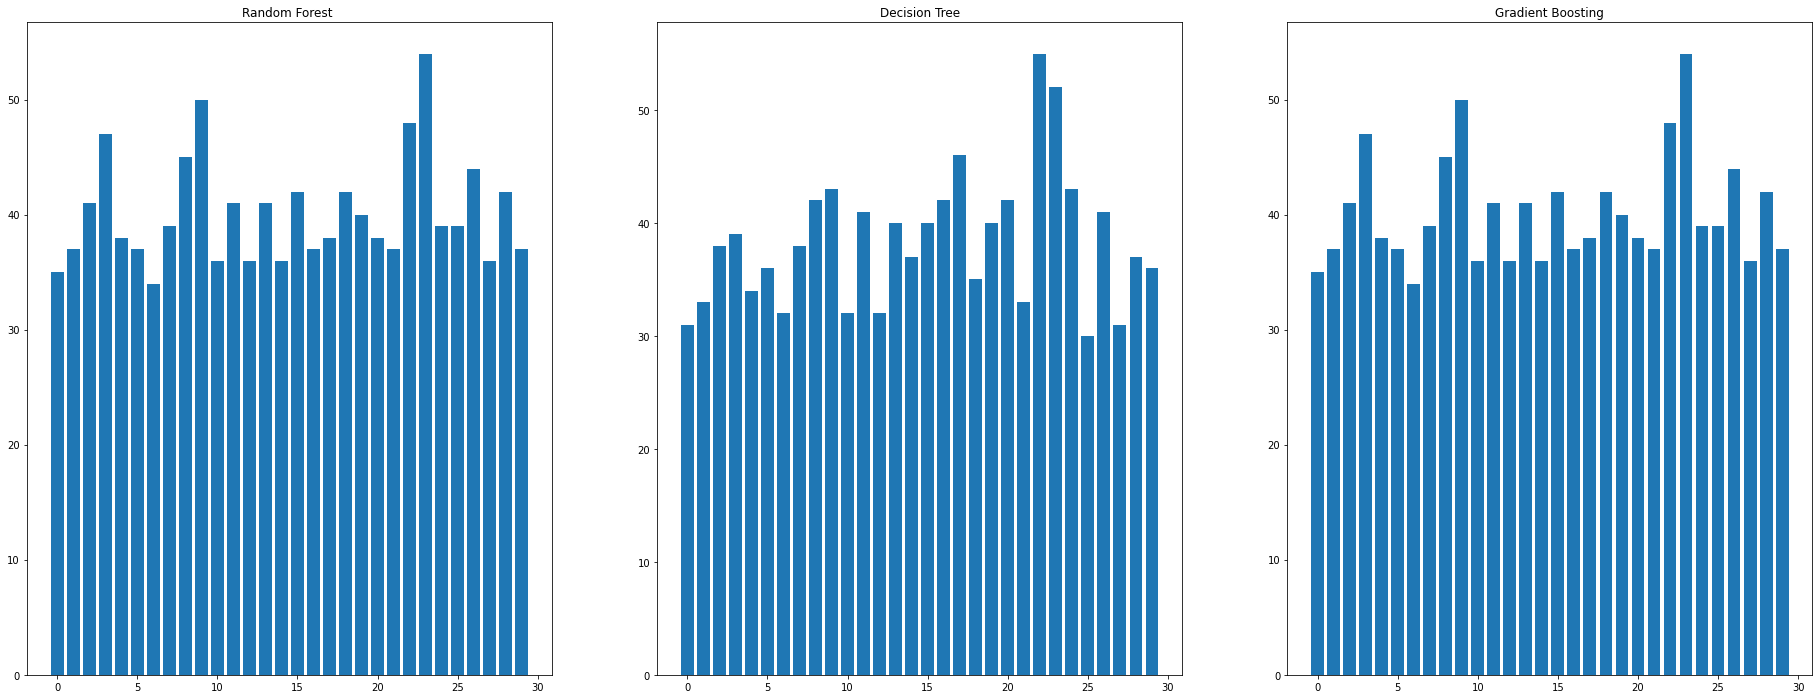

In [53]:
indices_x = range(0,30)
x = np.arange(len(indices_x))
fig, axes = plt.subplots(1, 3, figsize=(32, 12))


axes[0].bar(x, random_forest_result)
axes[1].bar(x, decision_tree_result)
axes[2].bar(x, random_forest_result)

axes[0].set_title("Random Forest ")
axes[1].set_title("Decision Tree")
axes[2].set_title("Gradient Boosting")

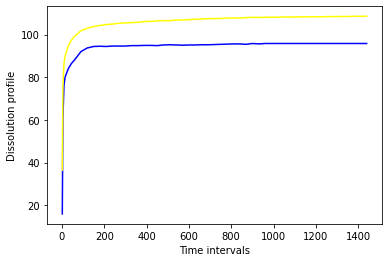

In [146]:

time_intervals = np.array([2,5,10,15,30,45,60,
                           90,120,150,180,210,240,
                           270,300,330,360,390,420,
                           450,480,510,540,570,600,
                           630,660,690,720,750,780,
                           810,840,870,900,930,960,
                           990,1020,1050,1080,1110,1140,
                           1170,1200,1230,1260,1290,1320,
                           1350,1380,1410,1440])

plt.plot(time_intervals, DISS_PROFILES[1], color = 'blue')
plt.plot(time_intervals, y_pred[2], color = 'yellow')
plt.xlabel('Time intervals')
plt.ylabel('Dissolution profile')
plt.show()